In [1]:
%pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.5 MB/s eta 0:00:00


Dado NUM_JOBS y NUM_MACHINES (en paralelo) determinar cual es la asignación de jobs a máquinas de tal manera que el procesamiento de los jobs sea el mímino.



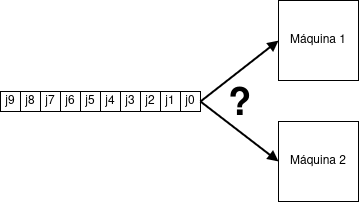


processing_times

| Trabajo | Máquina 1 | Máquina 2 |
|---------|-----------|-----------|
| 1       | 5         | 3         |
| 2       | 6         | 7         |
| 3       | 8         | 2         |
| 4       | 3         | 4         |
| 5       | 2         | 8         |
| 6       | 1         | 8         |
| 7       | 2         | 6         |
| 8       | 8         | 3         |
| 9       | 3         | 2         |
| 10      | 5         | 4         |

In [13]:
import random
from deap import base, creator, tools, algorithms

# Definir el problema en términos de DEAP
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # Minimizar el tiempo total de ejecución
creator.create("Individual", list, fitness=creator.FitnessMin)

# Parámteros
NUM_JOBS = 10
NUM_MACHINES = 2

# Generar tiempos de procesamiento aleatorios para los trabajos
# Cada trabajo tiene un tiempo de procesamiento para cada máquina

#processing_times = [[random.randint(1, 10) for _ in range(NUM_MACHINES)] for _ in range(NUM_JOBS)]
processing_times = [[5, 3], [6, 7], [8, 2], [3, 4], [2, 8], [1, 8], [2, 6], [8, 3], [3, 2], [5, 4]]

# Función para evaluar la solución (tiempo total de ejecución)
def evaluate(individual):
    machine_times = [0] * NUM_MACHINES  # Inicializar los tiempos de las máquinas
    for job, machine in enumerate(individual):
        machine_times[machine] += processing_times[job][machine]
    return max(machine_times),  # Minimizar el tiempo máximo de cualquier máquina

# Función para crear un individuo aleatorio (una asignación de trabajos a máquinas)
def create_individual():
    return [random.randint(0, NUM_MACHINES - 1) for _ in range(NUM_JOBS)]

# Configuración de DEAP
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxTwoPoint)  # Cruce de dos puntos
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1)  # Mutación
toolbox.register("select", tools.selTournament, tournsize=3)  # Selección por torneo
toolbox.register("evaluate", evaluate)

# Crear una población inicial
population = toolbox.population(n=100)

# Algoritmo Genético
algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=100, stats=None, halloffame=None, verbose=False)

# Obtener el mejor individuo
best_individual = tools.selBest(population, 1)[0]
print("Mejor solución:", best_individual)
print("Tiempo total de ejecución:", evaluate(best_individual)[0])


Mejor solución: [1, 0, 1, 0, 0, 0, 0, 1, 1, 1]
Tiempo total de ejecución: 14


/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
